<a href="https://colab.research.google.com/github/rzaevnicat/scratch_detection/blob/master/fina_one_shot_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
features = {"RS":"rolled-in scale", "Pa":"patches", "Cr":"crazing", "PS":"pitted surface", "In":"inclusion", "Sc":"scratches"}

In [0]:
import os
import numpy as np
from skimage.io import imread
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.pooling import MaxPooling2D
from tensorflow.python.keras.layers.merge import Concatenate
from tensorflow.python.keras.layers.core import Lambda, Flatten, Dense
from tensorflow.python.keras.initializers import glorot_uniform
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot as plt

# Please make sure that your tensorflow version is 2.0.0
print(tf.__version__)

2.0.0


In [0]:
from google.colab import drive
drive.mount('/content/drive')
FOLDER_IMAGE = "/content/drive/My Drive/data/data"
IMAGE_SIZE = 64

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def label_class(strs):
    if strs=="RS":
      return 1
    elif strs=="Pa":
      return 2
    elif strs=="Cr":
      return 3
    elif strs=="PS":
      return 4
    elif strs=="In":
      return 5
    elif strs=="Sc":
      return 6

In [0]:
def load_images():
    train_image = []
    y = []
    for filename in os.listdir(FOLDER_IMAGE):
        image_path = os.path.join(FOLDER_IMAGE, filename)
        img = image.load_img(image_path, target_size=(IMAGE_SIZE,IMAGE_SIZE,1), color_mode='grayscale')
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
        y.append(label_class(filename.split("_")[0]))    
        # break
    X = np.array(train_image)
    return X, y
X, y  = load_images()


In [0]:
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 1440 samples, validate on 360 samples
Epoch 1/10
1440/1440 [==============================] - 27s 19ms/sample - loss: 1.7727 - accuracy: 0.2556 - val_loss: 1.4726 - val_accuracy: 0.3333
Epoch 2/10
1440/1440 [==============================] - 26s 18ms/sample - loss: 1.3115 - accuracy: 0.4472 - val_loss: 1.0142 - val_accuracy: 0.6750
Epoch 3/10
1440/1440 [==============================] - 25s 18ms/sample - loss: 1.0158 - accuracy: 0.6208 - val_loss: 0.7554 - val_accuracy: 0.8167
Epoch 4/10
1440/1440 [==============================] - 26s 18ms/sample - loss: 0.7675 - accuracy: 0.7368 - val_loss: 0.6095 - val_accuracy: 0.8056
Epoch 5/10
1440/1440 [==============================] - 25s 18ms/sample - loss: 0.6543 - accuracy: 0.7757 - val_loss: 0.4785 - val_accuracy: 0.8639
Epoch 6/10
1440/1440 [==============================] - 26s 18ms/sample - loss: 0.5830 - accuracy: 0.7993 - val_loss: 0.4274 - val_accuracy: 0.8306
Epoch 7/10
1440/1440 [==============================] - 26s 18ms/

In [0]:
prediction = model.predict_classes(X_test)
prediction = to_categorical(prediction)

[0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0.]


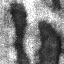

In [0]:
n = 102
print(prediction[n])
print(y_test[n])
img = image.array_to_img(X_test[n]*255)
display(img)
